<a href="https://colab.research.google.com/github/guptadarsh/FitInsight/blob/main/FitInsight_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Problem**

- The market research team at company wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.



1.   Perform descriptive analytics to create a customer profile for each company treadmill product by developing appropriate tables and charts.
2.   For each company treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('treadmill.csv')

In [ ]:
df.shape

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

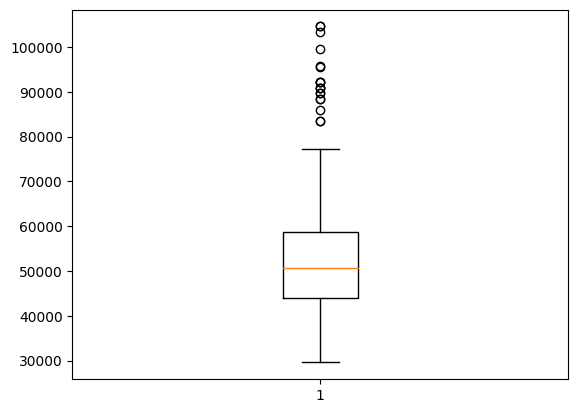

In [ ]:
plt.boxplot(df['Income'])
plt.show()

In [ ]:
Q1 = np.percentile(df['Income'], 25)
Q1

44058.75

In [ ]:
Q3 = np.percentile(df['Income'], 75)
Q3

58668.0

In [ ]:
IQR_age = Q3 - Q1
IQR_age

14609.25

In [ ]:
upper_age = Q3 + 1.5*IQR_age
upper_age

80581.875

In [ ]:
(df['Income'] > upper_age).sum() / len(df)

0.10555555555555556

In [ ]:
(df['Income'] > upper_age).sum()

19

- Mean = 53719.577778 is affected by outliers.
- Median(50 percentile) = 50596.500000.
- Upon examination, **180** outliers were detected in the dataset. These outliers represent values that deviate significantly from the typical range of income.
- **10.55%** of income are extream outliers.

In [ ]:
clipped_Income = np.clip(df['Income'],
                         np.percentile(df['Income'], 5),
                         np.percentile(df['Income'], 95))
clipped_Income

0      34053.15
1      34053.15
2      34053.15
3      34053.15
4      35247.00
         ...   
175    83416.00
176    89641.00
177    90886.00
178    90948.25
179    90948.25
Name: Income, Length: 180, dtype: float64

In [ ]:
df['Fitness'].describe()

count    180.000000
mean       3.311111
std        0.958869
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Fitness, dtype: float64

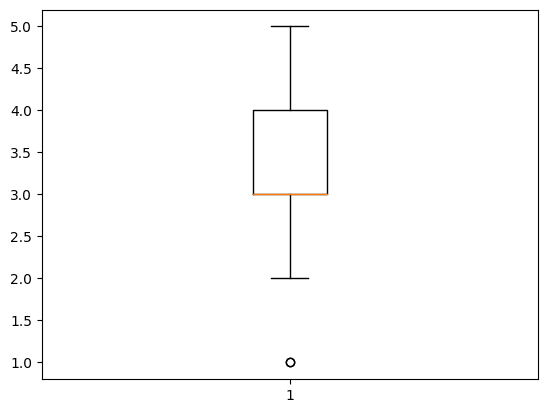

In [ ]:
plt.boxplot(df['Fitness'])
plt.show()

In [ ]:
Q1 = np.percentile(df['Fitness'], 25)
Q1

3.0

In [ ]:
Q3 = np.percentile(df['Fitness'], 75)
Q3

4.0

In [ ]:
IQR_Fitness = Q3 - Q1
IQR_Fitness

1.0

In [ ]:
upper_Fitness = Q3 + 1.5*IQR_Fitness
upper_Fitness

5.5

In [ ]:
lower_Fitness = Q1 - 1.5*IQR_Fitness
lower_Fitness

1.5

In [ ]:
(df['Fitness'] < lower_Fitness).sum() / len(df)

0.011111111111111112

In [ ]:
(df['Fitness'] > upper_Fitness).sum()

0

- Mean = 3.311111 is affected by outliers.
- Q1 = Q2 = 3.0, here 25 percentile is equal to median of fitness.
- Upon examination, it was observed that there are **2** outliers, signifying values that deviate considerably from the usual range of fitness.
- **1.11%** Outliers were identified as fitness falling below the whiskers of the box plot, and it is the extream outliers.

In [ ]:
clipped_Fitness = np.clip(df['Fitness'],
                          np.percentile(df['Fitness'], 5),
                          np.percentile(df['Fitness'], 95))
clipped_Fitness

0      4
1      3
2      3
3      3
4      2
      ..
175    5
176    4
177    5
178    5
179    5
Name: Fitness, Length: 180, dtype: int64

In [ ]:
df['Education'].describe()

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

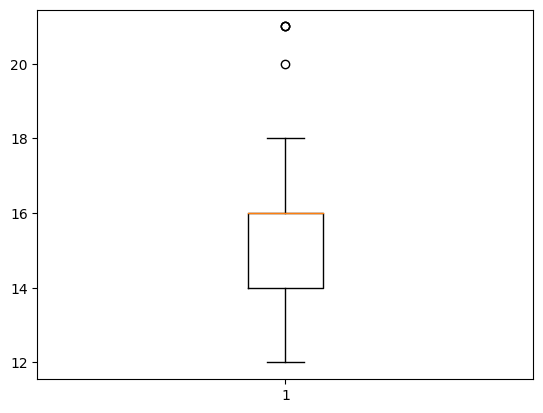

In [ ]:
plt.boxplot(df['Education'])
plt.show()

In [ ]:
Q1 = np.percentile(df['Education'], 25)
Q1

14.0

In [ ]:
Q3 = np.percentile(df['Education'], 75)
Q3

16.0

In [ ]:
IQR_education = Q3 - Q1
IQR_education

2.0

In [ ]:
upper_education = Q3 + 1.5*IQR_education
upper_education

19.0

In [ ]:
(df['Education'] > upper_education).sum()

4

In [ ]:
(df['Education'] > upper_education).sum() / len(df)

0.022222222222222223

- Mean = 15.572222 is affected by outliers.
- Q2 = Q3 = 16.0, here median is equal ot 75 percentile of education.
- Upon examination, it was observed that there are **4** outliers, signifying values that deviate considerably from the usual range of education.
- **2.22%** Outliers were identified as education falling above the whiskers of the box plot, and it is the extream outliers.

In [ ]:
clipped_Education = np.clip(df['Education'],
                            np.percentile(df['Education'], 5),
                            np.percentile(df['Education'], 95))
clipped_Education

0      14
1      15
2      14
3      14
4      14
       ..
175    18
176    18
177    16
178    18
179    18
Name: Education, Length: 180, dtype: int64

In [ ]:
df['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

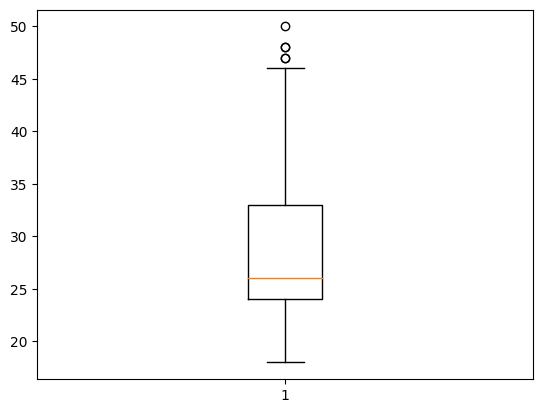

In [ ]:
plt.boxplot(df['Age'])
plt.show()

In [ ]:
Q1 = np.percentile(df['Age'], 25)
Q1

24.0

In [ ]:
Q3 = np.percentile(df['Age'], 75)
Q3

33.0

In [ ]:
IQR_age = Q3 - Q1
IQR_age

9.0

In [ ]:
upper_age = Q3 + 1.5*IQR_age
upper_age

46.5

In [ ]:
(df['Age'] > upper_age).sum()

5

In [ ]:
(df['Age'] > upper_age).sum() / len(df)

0.027777777777777776

- Mean = 28.788889 is affected by outliers.
- Median(50 percentile) = 26.000000
- Upon examination, **5** outliers were detected in the dataset. These outliers represent values that deviate significantly from the typical range of age.
- **2.77%** Outliers were identified as age falling above the max whiskers line of the box plot, and it is the extream outliers.

In [ ]:
clipped_Age = np.clip(df['Age'],
                      np.percentile(df['Age'], 5),
                      np.percentile(df['Age'], 95))
clipped_Age

0      20.00
1      20.00
2      20.00
3      20.00
4      20.00
       ...  
175    40.00
176    42.00
177    43.05
178    43.05
179    43.05
Name: Age, Length: 180, dtype: float64

In [ ]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


## Check if features like marital status, age have any effect on the product purchased

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


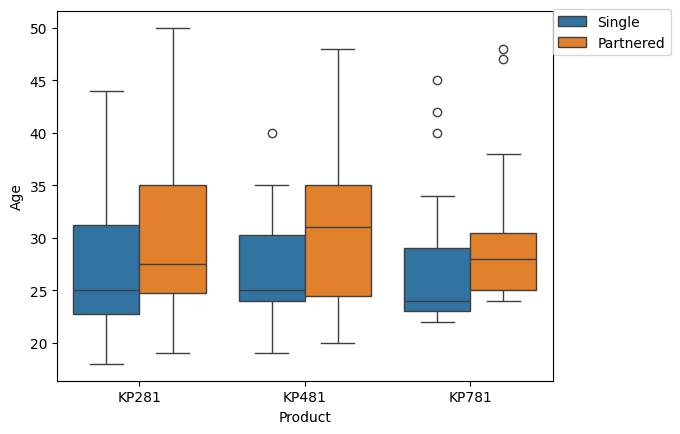

In [ ]:
sns.boxplot(data = df, x = 'Product', y = 'Age', hue = 'MaritalStatus')
plt.legend(loc=(1,0.88))
plt.show()

- KP281 ==> At the age of 25 and nearest to 27 are single and partnered, 50% of individuals use KP281.
- KP481 ==> At the age of nearest to 25 and nearest to 31 are single and partnered, 50% of individuals use KP481.
- KP781 ==> At the age of nearest to 25 and nearest to 27 are single and partnered, 50% of individuals use KP781.
- Conclusion: From the above box plot, the features like MaritalStatus and Age definitely influence product purchases.
- The purchase of product KP281 is higher, either among singles or partnered individuals, in comparison to KP481 and KP781.  







## Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table

In [ ]:
pd.crosstab(index = df['Product'],
            columns = df['Gender'],
            margins = True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [ ]:
pd.crosstab(index = df['Product'],
            columns = df['Gender'],
            margins = True,
            normalize = True)

Gender,Female,Male,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.161111,0.172222,0.333333
KP781,0.038889,0.183333,0.222222
All,0.422222,0.577778,1.000000


In [ ]:
df['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

- P(Male) = 0.577778
- P(Female) = 0.422222

In [ ]:
# P(KP281/Female) = P(KP281^Female)/P(Female)
0.222222/0.422222

0.5263155401660738

In [ ]:
# P(KP281/Male) = P(KP281^Male)/P(Male)
0.222222/0.577778

0.3846148520712107

In [ ]:
# P(KP481/Female) = P(KP481^Female)/P(Female)
0.161111/0.422222

0.3815788850415185

In [ ]:
# P(KP481/Male) = P(KP481^Male)/P(Male)
0.172222/0.577778

0.29807642381676

In [ ]:
# P(KP781/Female) = P(KP781^Female)/P(Female)
0.038889/0.422222

0.09210557479240779

In [ ]:
# P(KP781/Male) = P(KP781^Male)/P(Male)
0.183333/0.577778

0.31730699334346407

- P(KP281/Female) = P(KP281^Female)/P(Female)
- Given that a customer is female, **52.63%** is the probability she'll purchase a KP281.
- P(KP281/Male) = P(KP281^Male)/P(Male)
- Given that a customer is male, **38.46%** is the probability he'll purchase a KP281.
- P(KP481/Female) = P(KP481^Female)/P(Female)
- Given that a customer is female, **38.15%** is the probability she'll purchase a KP481.  
- P(KP481/Male) = P(KP481^Male)/P(Male)
- Given that a customer is male, **29.80%** is the probability he'll purchase a KP481.             
- P(KP781/Female) = P(KP781^Female)/P(Female)
- Given that a customer is female, **9.21%** is the probability she'll purchase a KP781.
- P(KP781/Male) = P(KP781^Male)/P(Male)
- Given that a customer is male, **31.73%** is the probability he'll purchase a KP781.

## Check correlation among different factors using heat maps or pair plots.

In [ ]:
correlation = df.corr()
correlation

<ipython-input-59-b6c2249924d6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


[]

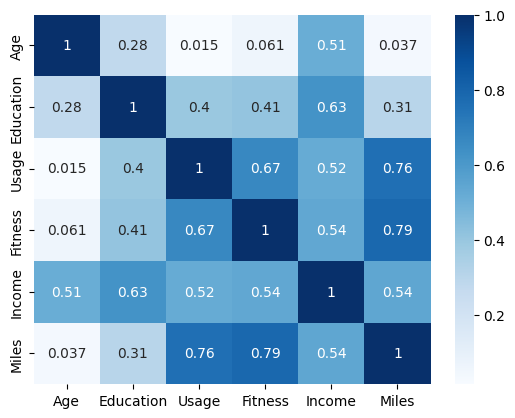

In [ ]:
sns.heatmap(correlation, cmap='Blues', annot=True)
plt.plot()

## With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?

- The probability of a male customer buying a KP281 treadmill is 0.2222.
- The probability of a female customer buying a KP281 treadmill is 0.2222.
- The probability of an overall customer buying a KP281 treadmill is 0.4444.
- The probability of a male customer buying a KP481 treadmill is 0.1722.
- The probability of a female customer buying a KP481 treadmill is 0.1611.
- The probability of an overall customer buying a KP481 treadmill is 0.3333.
- The probability of a male customer buying a KP781 treadmill is 0.1833.
- The probability of a female customer buying a KP781 treadmill is 0.0388.
- The probability of an overall customer buying a KP781 treadmill is 0.2222.


# Customer Profiling

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


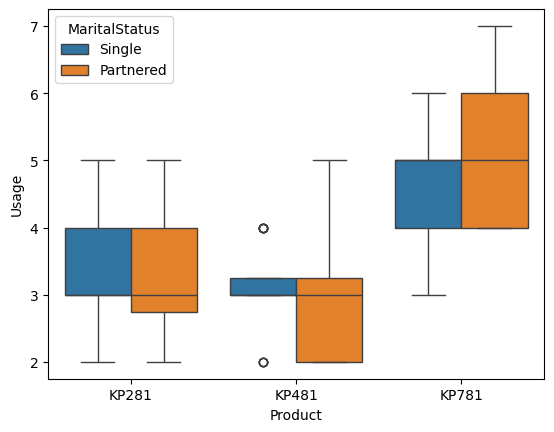

In [ ]:
sns.boxplot(data=df, x='Product', y='Usage', hue='MaritalStatus')
plt.show()

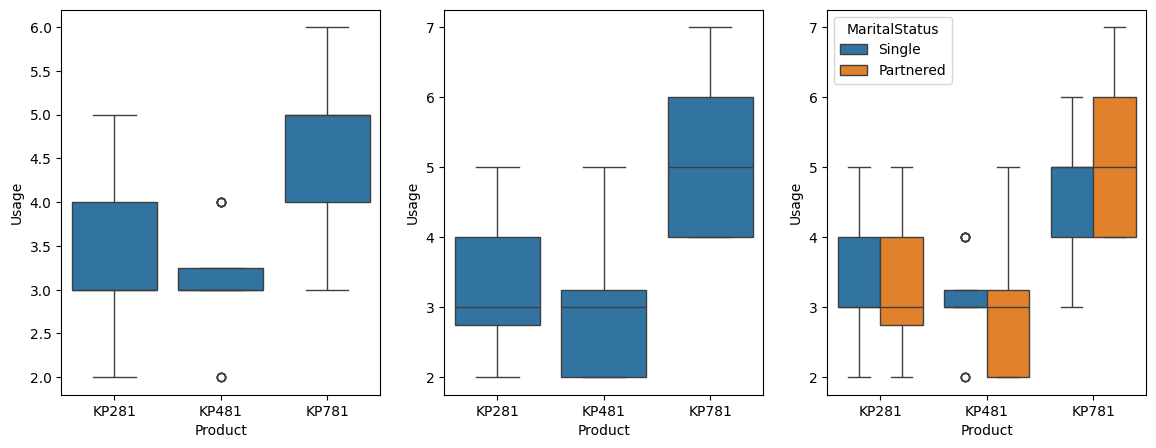

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
df_single = df[df['MaritalStatus'] == 'Single']
sns.boxplot(data=df_single, x='Product', y='Usage')
plt.subplot(1,3,2)
df_married = df[df['MaritalStatus'] == 'Partnered']
sns.boxplot(data=df_married, x='Product', y='Usage')
plt.subplot(1,3,3)
sns.boxplot(data=df, x='Product', y='Usage', hue='MaritalStatus')
plt.show()

- Upon examination, Most of the partnered people uses many number of times of the product. The maximum used product by married people is KP781.
- The most frequent product used by single peoples are KP281 and KP481.
- Conclusion: Apart from age, gender, and income, consider incorporating product usage and marital status.

# Recommendations

- Increasing the production of the KP281 treadmill is advisable, as it has been more frequently purchased than KP481, KP781.
- KP781 has been mainly purchased by males. We recommend that company promotes this product more to men compared to women.
- Partnered individuals has been also frequently purchase KP781. Therefore, we recommend that company targets partnered individuals for this product in comparison to singles.
- The most frequently purchased products by singles individuals are KP281 and KP481. Therefore, we recommend that company markets these products to singles individuals compared to partnered ones.